In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#load preprocessed dataset
df_reviews = pd.read_csv('data/pre_yelp_500k.csv')

In [9]:
#for the testing purpose, we will only use 100k entries
df_reviews_100k = df_reviews[:100000]
df_reviews_100k

,business_name,stars,text
0,Bellagio Gallery of Fine Art,2.0,someone worked many museum eager visit galery ...
1,Rio Hair Salon,1.0,actualy horified place stil busines 3 year old...
2,Deagan's Kitchen & Bar,5.0,love deagans realy atmosphere cozy festive shr...
3,Cabo Mexican Restaurant,1.0,dismal lukewarm defrostedtasting texmex glop m...
4,Raising Cane's Chicken Fingers,4.0,oh hapy day finaly cane near casa yes others g...
...,...,...,...
99995,KUMI by Chef Akira Back,4.0,great place protein rol hot me realy special f...
99996,Urban Beans,5.0,ive enjoyed cofe iced tea excelent service chi...
99997,Eddie V's Prime Seafood,3.0,huge fan overated ambience nice fod ok time pr...
99998,Tommy Bahama Restaurant | Bar | Store - Las Vegas,4.0,diner hub family service okay super busy holid...


In [11]:
#label positive, negative, neutral sentiments based on the star ratings
condition = [(df_reviews_100k['stars']>=4), (df_reviews_100k['stars']<=2), (df_reviews_100k['stars']==3)]
values = ['positive','negative','neutral']
df_reviews_100k['sentiment']=np.select(condition, values)
df_reviews_100k

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,business_name,stars,text,sentiment
0,Bellagio Gallery of Fine Art,2.0,someone worked many museum eager visit galery ...,negative
1,Rio Hair Salon,1.0,actualy horified place stil busines 3 year old...,negative
2,Deagan's Kitchen & Bar,5.0,love deagans realy atmosphere cozy festive shr...,positive
3,Cabo Mexican Restaurant,1.0,dismal lukewarm defrostedtasting texmex glop m...,negative
4,Raising Cane's Chicken Fingers,4.0,oh hapy day finaly cane near casa yes others g...,positive
...,...,...,...,...
99995,KUMI by Chef Akira Back,4.0,great place protein rol hot me realy special f...,positive
99996,Urban Beans,5.0,ive enjoyed cofe iced tea excelent service chi...,positive
99997,Eddie V's Prime Seafood,3.0,huge fan overated ambience nice fod ok time pr...,neutral
99998,Tommy Bahama Restaurant | Bar | Store - Las Vegas,4.0,diner hub family service okay super busy holid...,positive


In [33]:
#save in CSV
#df_reviews_100k.to_csv('data/pre_yelp_100k_sentiment.csv', index=False)

#checkpoint: load 100k sentiment data from csv
df_reviews_sentiment = pd.read_csv('data/pre_yelp_100k_sentiment.csv')
df_reviews_sentiment

,business_name,stars,text,sentiment
0,Bellagio Gallery of Fine Art,2.0,someone worked many museum eager visit galery ...,negative
1,Rio Hair Salon,1.0,actualy horified place stil busines 3 year old...,negative
2,Deagan's Kitchen & Bar,5.0,love deagans realy atmosphere cozy festive shr...,positive
3,Cabo Mexican Restaurant,1.0,dismal lukewarm defrostedtasting texmex glop m...,negative
4,Raising Cane's Chicken Fingers,4.0,oh hapy day finaly cane near casa yes others g...,positive
...,...,...,...,...
99995,KUMI by Chef Akira Back,4.0,great place protein rol hot me realy special f...,positive
99996,Urban Beans,5.0,ive enjoyed cofe iced tea excelent service chi...,positive
99997,Eddie V's Prime Seafood,3.0,huge fan overated ambience nice fod ok time pr...,neutral
99998,Tommy Bahama Restaurant | Bar | Store - Las Vegas,4.0,diner hub family service okay super busy holid...,positive


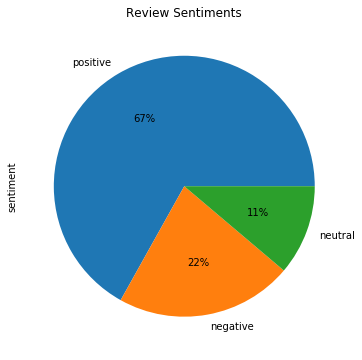

In [16]:
#plot the sentiment distribution
plt.figure(figsize=(6,6))
df_reviews_sentiment['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Review Sentiments');

In [55]:
#we will exclude neutral sentiments as we want to focus on extracting positive/negative sentiments
#for the testing purpose, we will only use 10k entries
df_reviews_sentiment = df_reviews_sentiment[df_reviews_sentiment['sentiment']!='neutral'][:10000]
df_reviews_sentiment

,business_name,stars,text,sentiment
0,Bellagio Gallery of Fine Art,2.0,someone worked many museum eager visit galery ...,negative
1,Rio Hair Salon,1.0,actualy horified place stil busines 3 year old...,negative
2,Deagan's Kitchen & Bar,5.0,love deagans realy atmosphere cozy festive shr...,positive
3,Cabo Mexican Restaurant,1.0,dismal lukewarm defrostedtasting texmex glop m...,negative
4,Raising Cane's Chicken Fingers,4.0,oh hapy day finaly cane near casa yes others g...,positive
...,...,...,...,...
11219,Morcilla,5.0,amazing fod glorious bevs could want litle cel...,positive
11220,Abuelo's Mexican Restaurant,1.0,wife ben going abuelos year fel like mexican f...,negative
11221,Crush,5.0,best vegan gardein chicken plate brocolini blo...,positive
11222,Swensons Drive-In,5.0,went first time today got excited heard great ...,positive


### TF-IDF - Feature Extraction

In [130]:
#TF-IDF using Scikit-Learn library
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#max_features:uses the 2,500 most frequently occuring words - removed
#min_df:include words that occur in at least 7 documents
#max_df:use words that occur in a maximum of 80% of the documents
vectorizer = TfidfVectorizer (min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(df_reviews_sentiment['text'].values.astype('U')).toarray()

processed_features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06242781, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [131]:
#split into training and test datasets in 8:2 ratio
X_train, X_test, y_train, y_test = train_test_split(processed_features, df_reviews_sentiment['sentiment'], test_size=0.2, random_state=0)

### 1. Logistic Regression Model

In [158]:
######## 1. LOGISTIC REGRESSION ########

# fitting a logistic regression model
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

# Fitting Logistic regression to the training set
log_model = LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1)
log_model.fit(X_train, y_train)

# Predicting the test set results
log_pred = log_model.predict(X_test)

# Training score
print("Score on training set: ", log_model.score(X_train,y_train))
print("Score on test set: ",log_model.score(X_test,y_test))

Score on training set:  0.95175
Score on test set:  0.9115


In [159]:
print(confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))
print("accuracy score: ",accuracy_score(y_test, log_pred))

"""
[[ 364  151]
 [  26 1459]]
              precision    recall  f1-score   support

    negative       0.93      0.71      0.80       515
    positive       0.91      0.98      0.94      1485

    accuracy                           0.91      2000
   macro avg       0.92      0.84      0.87      2000
weighted avg       0.91      0.91      0.91      2000

0.9115
"""

[[ 364  151]
 [  26 1459]]
              precision    recall  f1-score   support

    negative       0.93      0.71      0.80       515
    positive       0.91      0.98      0.94      1485

    accuracy                           0.91      2000
   macro avg       0.92      0.84      0.87      2000
weighted avg       0.91      0.91      0.91      2000

accuracy score:  0.9115


'\n[[ 364  151]\n [  26 1459]]\n              precision    recall  f1-score   support\n\n    negative       0.93      0.71      0.80       515\n    positive       0.91      0.98      0.94      1485\n\n    accuracy                           0.91      2000\n   macro avg       0.92      0.84      0.87      2000\nweighted avg       0.91      0.91      0.91      2000\n\n0.9115\n'

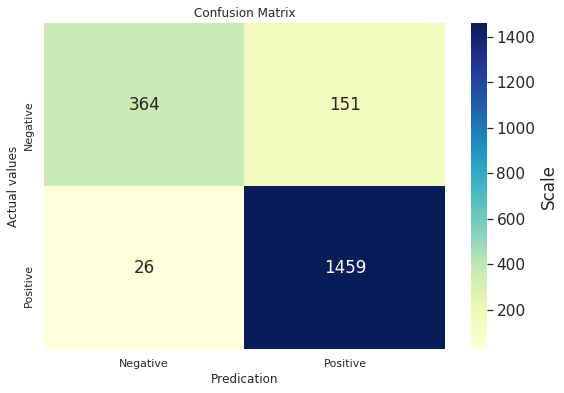

In [160]:
def plot_confusion_matrix(data, labels, output_filename):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
 
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}, fmt='g')
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set(ylabel='Actual values', xlabel='Predication')

    #plt.savefig(output_filename, bbox_inches='tight', dpi=300)

    plt.show()
    plt.close()

# define data
data = confusion_matrix(y_test,log_pred)
 
# plot confusion matrix
plot_confusion_matrix(data, labels, "confusion_matrix.png")

### 2. CART Classifier

In [161]:
from sklearn.tree import DecisionTreeClassifier

# Create and train decision tree classifer object
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

# Predicting the test set
clf_pred = clf.predict(X_test)

In [163]:
# training score
print("CART score - trainnig set: ",clf.score(X_train, y_train))
print("CART score - test set: ",clf.score(X_test, y_test))
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))
print("accuracy score: ",accuracy_score(y_test, clf_pred))


"""
[[ 329  186]
 [ 172 1313]]
              precision    recall  f1-score   support

    negative       0.66      0.64      0.65       515
    positive       0.88      0.88      0.88      1485

    accuracy                           0.82      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.82      0.82      0.82      2000

accuracy score:  0.821
"""

CART score - trainnig set:  1.0
CART score - test set:  0.823
[[ 341  174]
 [ 180 1305]]
              precision    recall  f1-score   support

    negative       0.65      0.66      0.66       515
    positive       0.88      0.88      0.88      1485

    accuracy                           0.82      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.82      0.82      0.82      2000

accuracy score:  0.823


'\n[[ 329  186]\n [ 172 1313]]\n              precision    recall  f1-score   support\n\n    negative       0.66      0.64      0.65       515\n    positive       0.88      0.88      0.88      1485\n\n    accuracy                           0.82      2000\n   macro avg       0.77      0.76      0.76      2000\nweighted avg       0.82      0.82      0.82      2000\n\naccuracy score:  0.821\n'

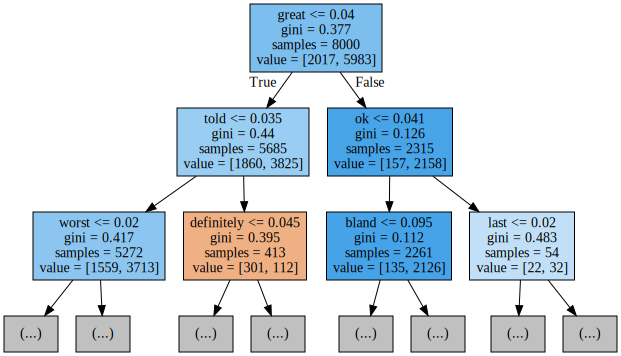

In [168]:
#Visualize the tree
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=vectorizer.get_feature_names(),  
                                filled=True, max_depth=2)
graphviz.Source(dot_data, format="png")

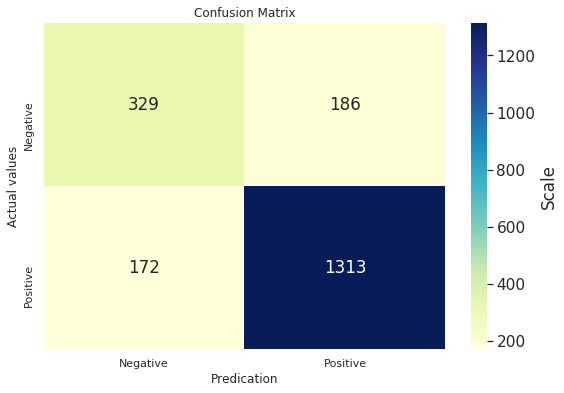

In [157]:
# define data
data = confusion_matrix(y_test,clf_pred)
 
# plot confusion matrix
plot_confusion_matrix(data, labels, "confusion_matrix.png")

### 3. Random Forest

In [145]:
#Build a Random Forest classifier model
rf_model = RandomForestClassifier(n_estimators=200, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [146]:
# Predicting the test set
predictions = text_classifier.predict(X_test)

In [147]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("RF score - trainnig set: ",rf_model.score(X_train, y_train))
print("RF score - test set: ",rf_model.score(X_test, y_test))

#training score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("accuracy score: ",accuracy_score(y_test, predictions))

"""
[[ 312  203]
 [  22 1463]]
              precision    recall  f1-score   support

    negative       0.93      0.61      0.73       515
    positive       0.88      0.99      0.93      1485

    accuracy                           0.89      2000
   macro avg       0.91      0.80      0.83      2000
weighted avg       0.89      0.89      0.88      2000

0.8875
"""

[[ 312  203]
 [  22 1463]]
              precision    recall  f1-score   support

    negative       0.93      0.61      0.73       515
    positive       0.88      0.99      0.93      1485

    accuracy                           0.89      2000
   macro avg       0.91      0.80      0.83      2000
weighted avg       0.89      0.89      0.88      2000

accuracy score:  0.8875


'\n[[ 312  203]\n [  22 1463]]\n              precision    recall  f1-score   support\n\n    negative       0.93      0.61      0.73       515\n    positive       0.88      0.99      0.93      1485\n\n    accuracy                           0.89      2000\n   macro avg       0.91      0.80      0.83      2000\nweighted avg       0.89      0.89      0.88      2000\n\n0.8875\n'

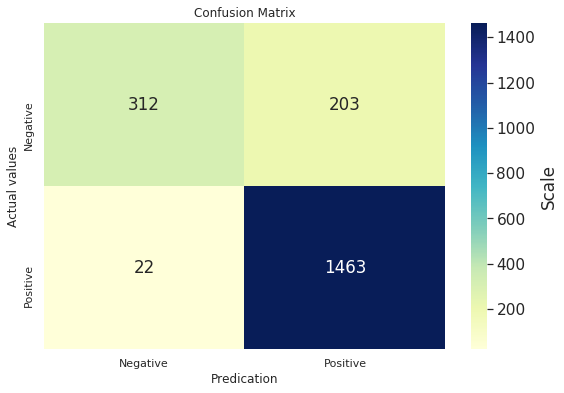

In [148]:
# define data
data = confusion_matrix(y_test,predictions)
 
# define labels
labels = ["Negative", "Positive"]

# plot confusion matrix
plot_confusion_matrix(data, labels, "confusion_matrix.png")

### 4. XGBoost

In [149]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

#Build XGB model
xgb_model = XGBClassifier(random_state=1)
xgb_model.fit(X_train, y_train)

# Predicting the test set
xgb_pred = xgb_model.predict(X_test)

XGBoost score - trainnig set:  0.985875
XGBoost score - test set:  0.9135
[[ 396  119]
 [  54 1431]]
              precision    recall  f1-score   support

    negative       0.88      0.77      0.82       515
    positive       0.92      0.96      0.94      1485

    accuracy                           0.91      2000
   macro avg       0.90      0.87      0.88      2000
weighted avg       0.91      0.91      0.91      2000

accuracy score:  0.9135


In [ ]:
#training score
print("XGBoost score - trainnig set: ",xgb_model.score(X_train, y_train))
print("XGBoost score - test set: ",xgb_model.score(X_test, y_test))

print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))
print("accuracy score: ",accuracy_score(y_test, xgb_pred))

"""
XGBoost score - trainnig set:  0.985875
XGBoost score - test set:  0.9135
[[ 396  119]
 [  54 1431]]
              precision    recall  f1-score   support

    negative       0.88      0.77      0.82       515
    positive       0.92      0.96      0.94      1485

    accuracy                           0.91      2000
   macro avg       0.90      0.87      0.88      2000
weighted avg       0.91      0.91      0.91      2000

accuracy score:  0.9135
"""

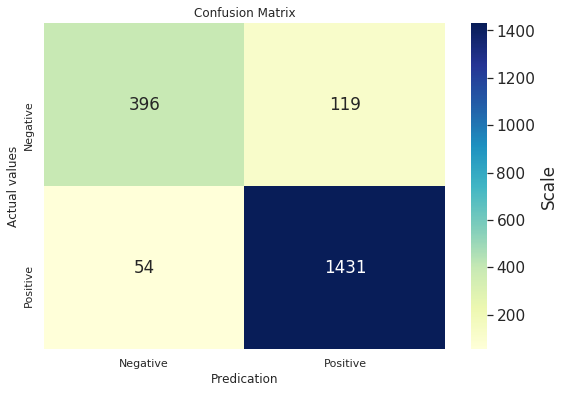

In [150]:
# define data
data = confusion_matrix(y_test,XGB_pred)

# plot confusion matrix
plot_confusion_matrix(data, labels, "confusion_matrix.png")

### 5. Multilayer Perceptron Classifier

In [151]:
from sklearn.neural_network import MLPClassifier

#multilayer perceptron classifier
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

# Predicting the test set
mlp_pred = mlp.predict(X_test)

In [153]:
#training score
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,mlp_pred))
print("Classification Report:")
print(classification_report(y_test,mlp_pred))
print("accuracy score:",round(accuracy_score(y_test,mlp_pred)*100,2))

"""
Confusion Matrix for Multilayer Perceptron Classifier:
[[ 414  101]
 [  62 1423]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.80      0.84       515
    positive       0.93      0.96      0.95      1485

    accuracy                           0.92      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.92      0.92      0.92      2000

accuracy score: 91.85
"""

Confusion Matrix for Multilayer Perceptron Classifier:
[[ 414  101]
 [  62 1423]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.80      0.84       515
    positive       0.93      0.96      0.95      1485

    accuracy                           0.92      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.92      0.92      0.92      2000

accuracy score: 91.85


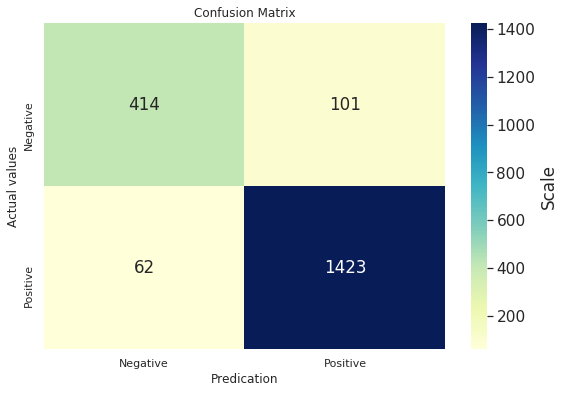

In [154]:
# define data
data = confusion_matrix(y_test,mlp_pred)

# plot confusion matrix
plot_confusion_matrix(data, labels, "confusion_matrix.png")